## Language Detection Model

In [1]:
# Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load the dataset

In [4]:
data = pd.read_csv("DataSet.csv")

### Exploratory Data Analysis (EDA)

In [5]:
data

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch
...,...,...
21995,hors du terrain les années et sont des année...,French
21996,ใน พศ หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเ...,Thai
21997,con motivo de la celebración del septuagésimoq...,Spanish
21998,年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《baby i like》，由...,Chinese


In [6]:
# Display the first few rows of the dataset

In [7]:
print("First 5 records:")
print(data.head())

First 5 records:
                                                Text  language
0  klement gottwaldi surnukeha palsameeriti ning ...  Estonian
1  sebes joseph pereira thomas  på eng the jesuit...   Swedish
2  ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...      Thai
3  விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...     Tamil
4  de spons behoort tot het geslacht haliclona en...     Dutch


In [8]:
# Check for null values

In [9]:
print("\nChecking for null values:")
print(data.isnull().sum())


Checking for null values:
Text        0
language    0
dtype: int64


In [10]:
# Plotting the distribution of languages using matplotlib

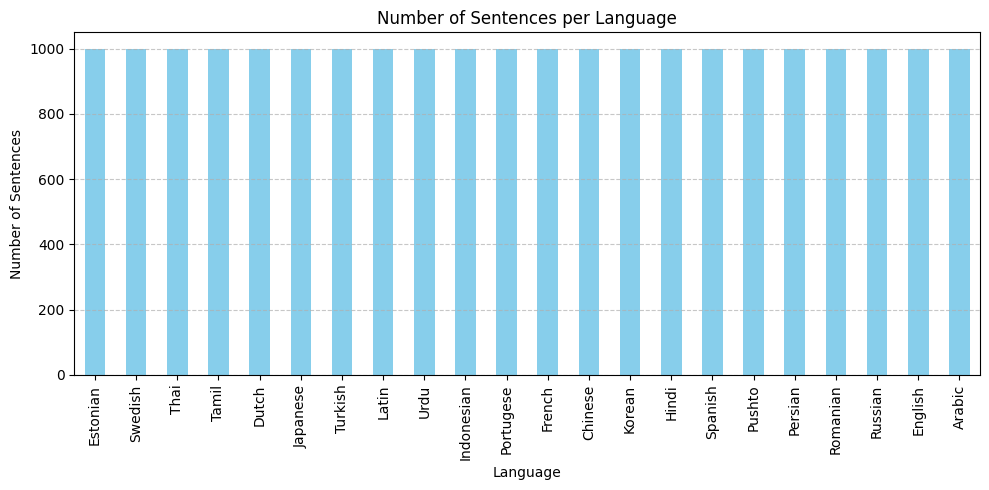

In [11]:
plt.figure(figsize=(10,5))
data['language'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Sentences per Language')
plt.xlabel('Language')
plt.ylabel('Number of Sentences')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Data Preprocessing

In [12]:
# Display data types

In [13]:
print("\nData types:")
print(data.dtypes)


Data types:
Text        object
language    object
dtype: object


In [14]:
# converting the text(Object || String) data into array

In [15]:
x = np.array(data['Text'])
y = np.array(data['language']) 

In [16]:
print(x)

['klement gottwaldi surnukeha palsameeriti ning paigutati mausoleumi surnukeha oli aga liiga hilja ja oskamatult palsameeritud ning hakkas ilmutama lagunemise tundemärke  aastal viidi ta surnukeha mausoleumist ära ja kremeeriti zlíni linn kandis aastatel – nime gottwaldov ukrainas harkivi oblastis kandis zmiivi linn aastatel – nime gotvald'
 'sebes joseph pereira thomas  på eng the jesuits and the sino-russian treaty of nerchinsk  the diary of thomas pereira bibliotheca instituti historici s i --   rome libris '
 'ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เริ่มตั้งแต่ถนนสนามไชยถึงแม่น้ำเจ้าพระยาที่ถนนตก กรุงเทพมหานคร เป็นถนนรุ่นแรกที่ใช้เทคนิคการสร้างแบบตะวันตก ปัจจุบันผ่านพื้นที่เขตพระนคร เขตป้อมปราบศัตรูพ่าย เขตสัมพันธวงศ์ เขตบางรัก เขตสาทร และเขตบางคอแหลม'
 ...
 'con motivo de la celebración del septuagésimoquinto ° aniversario de la fundación del departamento en  guillermo ceballos espinosa presentó a la gobernación de caldas por encargo de su titular dilia estrada de gómez el h

In [17]:
print(y)

['Estonian' 'Swedish' 'Thai' ... 'Spanish' 'Chinese' 'Romanian']


In [18]:
# Print input and labels (using slicing)

In [19]:
print("\nText samples:")
print(x[:5])
print("\nCorresponding languages:")
print(y[:5])


Text samples:
['klement gottwaldi surnukeha palsameeriti ning paigutati mausoleumi surnukeha oli aga liiga hilja ja oskamatult palsameeritud ning hakkas ilmutama lagunemise tundemärke  aastal viidi ta surnukeha mausoleumist ära ja kremeeriti zlíni linn kandis aastatel – nime gottwaldov ukrainas harkivi oblastis kandis zmiivi linn aastatel – nime gotvald'
 'sebes joseph pereira thomas  på eng the jesuits and the sino-russian treaty of nerchinsk  the diary of thomas pereira bibliotheca instituti historici s i --   rome libris '
 'ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เริ่มตั้งแต่ถนนสนามไชยถึงแม่น้ำเจ้าพระยาที่ถนนตก กรุงเทพมหานคร เป็นถนนรุ่นแรกที่ใช้เทคนิคการสร้างแบบตะวันตก ปัจจุบันผ่านพื้นที่เขตพระนคร เขตป้อมปราบศัตรูพ่าย เขตสัมพันธวงศ์ เขตบางรัก เขตสาทร และเขตบางคอแหลม'
 'விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திரிகை-விசாகப்பட்டின ஆசிரியர் சம்பத்துடன் இணைந்து விரிவுபடுத்தினார்  ஆண்டுகள் தொடர்ந்து செயலராக இருந்து தமிழ்மன்றத்தை நடத்திச் சென்றார்  கோவை செம்மொழி மாநாட்டில் "தமிழ

### Feature Extraction

In [20]:
# Convert text to numeric feature vectors (Bag of Words model)

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
cv = CountVectorizer()
X = cv.fit_transform(x)

### Train-Test Split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
# now we are checking for how much sentences does each language have

In [25]:
data['language'].value_counts()

language
Estonian      1000
Swedish       1000
Thai          1000
Tamil         1000
Dutch         1000
Japanese      1000
Turkish       1000
Latin         1000
Urdu          1000
Indonesian    1000
Portugese     1000
French        1000
Chinese       1000
Korean        1000
Hindi         1000
Spanish       1000
Pushto        1000
Persian       1000
Romanian      1000
Russian       1000
English       1000
Arabic        1000
Name: count, dtype: int64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
print("\nTraining data shape:")
print(X_train.shape)


Training data shape:
(14740, 277720)


### Model Building

In [28]:
from sklearn.naive_bayes import MultinomialNB

In [29]:
# Initialize and train the model

In [30]:
model = MultinomialNB()

In [31]:
# putting the train data into the model

In [32]:
model.fit(X_train, y_train)

MultinomialNB()

In [33]:
# Evaluate the model

In [34]:
accuracy = model.score(X_test, y_test)

In [35]:
print("\nModel Accuracy: {:.2f}%".format(accuracy * 100))


Model Accuracy: 95.32%


In [36]:
# Our model accuracy is 95.32% 

### Testing the model / OUTPUT

In [37]:
# Get user input and predict the language

In [ ]:
user_input = input("\nEnter a text: ")
# Transform input text into numeric format
user_data = cv.transform([user_input]).toarray()
# Predict the language
output = model.predict(user_data)
print("Predicted Language:", output[0])

In [ ]:
# Estonian – Tere, see on andmeteaduse projekt

# Swedish – Hej, det här är ett datavetenskapsprojekt

# Thai – สวัสดี นี่คือโครงการวิทยาศาสตร์ข้อมูล

# Tamil – வணக்கம், இது ஒரு தரவியல் அறிவியல் திட்டம்

# Dutch – Hoi, dit is een datawetenschapsproject

# Japanese – こんにちは、これはデータサイエンスのプロジェクトです

# Turkish – Merhaba, bu bir veri bilimi projesidir

# Latin – Salve, hoc est consilium scientiae datae

# Urdu – سلام، یہ ایک ڈیٹا سائنس کا منصوبہ ہے

# Indonesian – Hai, ini adalah proyek ilmu data

# Portuguese – Olá, este é um projeto de ciência de dados

# French – Salut, c'est un projet de science des données

# Chinese (Simplified) – 嗨，这是一个数据科学项目

# Korean – 안녕하세요, 이것은 데이터 과학 프로젝트입니다

# Hindi – नमस्ते, यह एक डेटा साइंस प्रोजेक्ट है

# Spanish – Hola, este es un proyecto de ciencia de datos

# Pashto (Pushto) – سلام، دا د معلوماتو ساینس پروژه ده

# Persian (Farsi) – سلام، این یک پروژه علم داده است

# Romanian – Salut, acesta este un proiect de știința datelor

# Russian – Привет, это проект по науке о данных

# English – Hi, this is a data science project

# Arabic – مرحباً، هذا مشروع علم البيانات